d向量: [-6.0, 0.0, 0.0, 0.0]
M计算结果: [-3.4666666666666663, 0.9333333333333331, -0.2666666666666666, 0.1333333333333333]


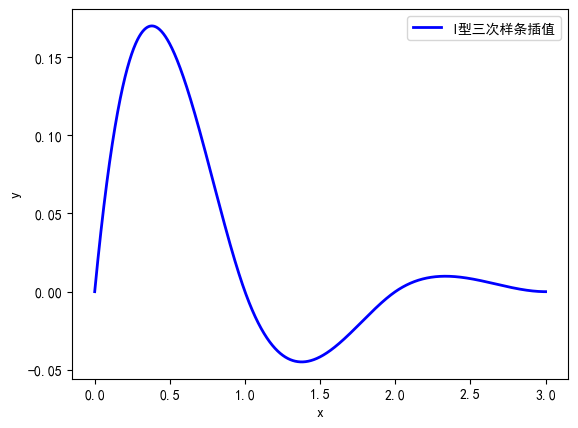

In [ ]:
'''
三次插值样条条函数:I型三次样条插值问题--三弯矩方程
'''
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams['font.sans-serif'] = ['SimHei']  # 使用黑体字体
plt.rcParams['axes.unicode_minus'] = False  # 解决负号显示问题


s = input("请按照此格式输入:x1,f1,......xn-1,fn-1")
num = s.split(',')

def afloat(s):
    if '/' in s:
        numerator, denominator = s.split('/')
        return float(numerator) / float(denominator)
    else:
        return float(s)

x = []
x.append(0)
fx = []
fx.append(0)
for i in range(len(num)):
    if i % 2 == 0:
        x.append(afloat(num[i]))
    else:
        fx.append(afloat(num[i]))


s = input("请输入I型插值边界条件:x0,f0,dfx0,xn,fxn,dfxn")
num = s.split(',')

x[0] = afloat(num[0])
x.append(afloat(num[3]))
fx[0] = afloat(num[1])
fx.append(afloat(num[4]))
dfx = []
dfx.append(afloat(num[2]))
dfx.append(afloat(num[5]))





def f(x,y,i,j):
    if i==j:
        return y[i]
    else:
        return (f(x,y,i+1,j)-f(x,y,i,j-1))/(x[j]-x[i])

def put(x):
    lamb = []
    mu = []
    h = []
    for i in range(len(x)-1):
        h.append(x[i+1]-x[i])
    for i in range(len(x)-2):
        lamb.append(h[i+1]/(h[i]+h[i+1]))
        mu.append(h[i]/(h[i]+h[i+1]))

        
    return lamb,mu


def inputd(x, fx, dfx):
    m = len(x) 
    d = []

    h0 = x[1] - x[0]
    d0 = 6/(h0) * ((fx[1] - fx[0])/h0 - dfx[0])
    d.append(d0)
    
    # 处理内部节点（i从1到m-2）
    for i in range(1, m-1):
        d_i = 6 * f(x, fx, i-1, i+1)
        d.append(d_i)
    
    
    hn = x[m-1] - x[m-2]
    dn = 6/(hn) * (dfx[1] - (fx[m-1] - fx[m-2])/hn)
    d.append(dn)
    
    print("d向量:", d)
    return d



def solve_M(x,fx,dfx):

    lamb,mu = put(x)
    d = inputd(x,fx,dfx)
    l = len(d)

    # 创建矩阵A
    A = np.zeros((l, l))

    for i in range(1, l):
        A[i, i] = 2
        if i > 0 and i - 1 < len(mu):
            A[i, i - 1] = mu[i - 1]
        if i < l - 1 and i - 1 < len(lamb):
            A[i, i + 1] = lamb[i - 1]

    A[-1, -2:] = [1, 2]
    A[0, :2] = [2, 1]

    
    D = np.zeros(l)
    for i in range(l):
        D[i] = d[i]


    Mx = np.linalg.inv(A) @ D
    M = []
    for i in range(l):
        M.append(Mx[i])

    print("M计算结果:",M)
    return M



def div_I(x, fx, M, ver):
    # 判断ver是否为单个值
    if np.isscalar(ver):
        ver = [ver]
    l = len(x)
    y = []
    for px in ver:
        for i in range(1, l):
            if np.logical_and(px >= x[i - 1], px <= x[i]):
                h = x[i] - x[i - 1]
                re1 = 1 / (6 * h) * ((x[i] - px) ** 3 * M[i - 1] + (px - x[i - 1]) ** 3 * M[i])
                re2 = 1 / h * ((x[i] - px) * fx[i - 1] + (px - x[i - 1]) * fx[i])
                re3 = h / 6 * ((x[i] - px) * M[i - 1] + (px - x[i - 1]) * M[i])
                y.append(re1 + re2 - re3)
                break
    # 如果ver是单个值，返回单个结果
    if len(y) == 1:
        return y[0]
    return np.array(y)


M = solve_M(x,fx,dfx)


px = np.linspace(x[0],x[len(x)-1],10000)
py = div_I(x,fx,M,px)

plt.figure()
plt.xlabel('x')
plt.ylabel('y')
plt.plot(px,py,label="I型三次样条插值",color="blue", linewidth=2)
plt.legend()
plt.show()

f计算结果: [-2, 0, 0, 0, 0, 0]
A计算结果:
[[ 1.  0. -1.  0.  0.  0.]
 [ 1.  4.  1.  0.  0.  0.]
 [ 0.  1.  4.  1.  0.  0.]
 [ 0.  0.  1.  4.  1.  0.]
 [ 0.  0.  0.  1.  4.  1.]
 [ 0.  0.  0. -1.  0.  1.]]
c计算结果: [-2.15555556  0.57777778 -0.15555556  0.04444444 -0.02222222  0.04444444]


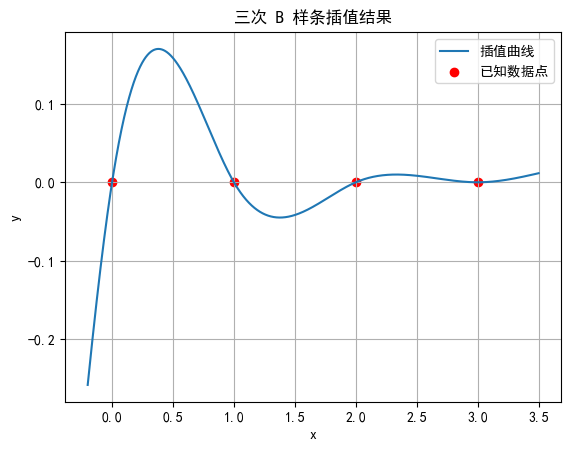

In [ ]:
'''
三次B样条插值
'''
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams['font.sans-serif'] = ['SimHei']  # 使用黑体字体
plt.rcParams['axes.unicode_minus'] = False  # 解决负号显示问题


x = [0,1,2,3]
fx = [0,0,0,0]
dfx = [1,0]


h = x[1]-x[0]
xx = []
xx.append(x[0]-h)
for i in x:
    xx.append(i)
xx.append(x[len(x)-1]+h)


def B3(ver):
    if ver < 0:
        ver = -ver

    if ver >= 2:
        return 0
    if (ver >= 1) & (ver < 2):
        return -1/6*ver**3 + ver**2 -2*ver + 4/3
    if (ver >= 0) & (ver < 1):
        return 1/2*ver**3 - ver**2 + 2/3
    

def s_I(ver,c,xx):
    sum = 0
    #等距节点
    h = xx[1] - xx[0]
    for i in range(len(c)):
        sum = sum + c[i] * B3((ver-xx[i]/h))

    return sum



def vector_f(x,fx,dfx): 
    f = []
    h = x[1] - x[0]
    f.append(-2*h*dfx[0])
    for i in fx:
        f.append(6*i)
    f.append(2*h*dfx[1])

    return f


def solve_c(x,fx,dfx):

    l = len(x)+2
    f = vector_f(x,fx,dfx)

    # 创建矩阵A
    A = np.zeros((l, l))
    for i in range(1,l-1):
        A[i][i] = 4
        A[i][i-1] = 1
        A[i][i+1] = 1

    A[0][0] = 1
    A[0][1] = 0
    A[0][2] = -1

    A[l-1][l-1] = 1
    A[l-1][l-2] = 0
    A[l-1][l-3] = -1

    c = np.linalg.solve(A, f)
    print("f计算结果:",f)
    print("A计算结果:")
    print(A)
    print("c计算结果:",c)
    return c


c = solve_c(x,fx,dfx)

x_min = min(x)-0.2
x_max = max(x)+0.5
ver = np.linspace(x_min, x_max, 5000)
ver_y = []
for v in ver:
    ver_y.append(s_I(v, c, xx))


# 绘制图像
plt.plot(ver, ver_y, label='插值曲线')
plt.scatter(x, fx, color='red', label='已知数据点')
plt.xlabel('x')
plt.ylabel('y')
plt.title('三次 B 样条插值结果')
plt.legend()
plt.grid(True)
plt.show()
